In [846]:
import random
from collections import namedtuple
from matplotlib import pyplot as plt

In [847]:
def problem(N, seed=None):
    random.seed(seed)
    return [
        list(set(random.randint(0, N - 1) for n in range(random.randint(N // 5, N // 2))))
        for n in range(random.randint(N, N * 5))
    ]

N = 50
generated_problem = problem(N)
generated_problem




[[0, 3, 4, 5, 6, 14, 16, 17, 18, 20, 21, 22, 29, 31, 36, 40, 41, 43, 46, 48],
 [2,
  4,
  15,
  16,
  17,
  18,
  22,
  23,
  24,
  28,
  29,
  33,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  49],
 [32, 33, 6, 39, 8, 7, 41, 11, 13, 47, 20],
 [1, 35, 36, 6, 7, 8, 41, 42, 11, 44, 40, 12, 18, 21, 26, 30],
 [2, 3, 38, 42, 44, 15, 48, 16, 18, 21, 23, 27, 30, 31],
 [0, 1, 4, 36, 6, 38, 40, 47, 18, 21, 24, 28, 31],
 [2, 3, 4, 6, 40, 41, 43, 44, 11, 12, 17, 19, 26, 29],
 [33, 3, 35, 38, 40, 10, 11, 42, 47, 49, 19],
 [33, 35, 37, 39, 8, 41, 11, 43, 45, 46, 14, 13, 19, 23, 24, 27, 31],
 [32, 1, 34, 35, 4, 5, 6, 39, 8, 41, 10, 37, 12, 9, 17, 22, 25],
 [1, 34, 3, 40, 11, 44, 13, 46, 15, 17, 18, 19, 25, 27],
 [32, 34, 5, 8, 40, 45, 14, 49, 19, 20, 21, 25],
 [32, 37, 9, 11, 46, 48, 49, 24, 25, 26, 29],
 [33, 40, 8, 44, 16, 17, 19, 26, 27, 30, 31],
 [0, 3, 36, 37, 9, 43, 44, 45, 14, 16, 21, 25, 26, 28, 29],
 [0, 2, 34, 37, 38, 7, 46, 19, 25, 26, 29],
 [0, 32, 34, 36, 5, 39, 40, 41, 42, 11

## Genetic Algorithm
#### Genome:
    encoded as a boolean tuple in which each element corresponds to one list of the problem

    


In [848]:
PROBLEM_SIZE = len(generated_problem)
POPULATION_SIZE = 30
NUM_GENERATIONS = 100
OFFSPRING_SIZE = 50


Individual = namedtuple("Individual", ["genome", "fitness"])

def evaluate_weight(genome):
    indexes = [i for i, x in enumerate(genome) if x == 1]
    all_elements = [element for sublist in [generated_problem[x] for x in indexes] for element in sublist]
    return len(all_elements)

def is_solving(genome):
    indexes = [i for i, x in enumerate(genome) if x == 1]
    all_elements = [element for sublist in [generated_problem[x] for x in indexes] for element in sublist]
    coverage = len(set(all_elements))
    return coverage == N


def evaluate_fitness(genome):
    #fitness considers how many numbers are already covered and the weight of the solution
    indexes = [i for i, x in enumerate(genome) if x == 1]
    all_elements = [element for sublist in [generated_problem[x] for x in indexes] for element in sublist]
    weight = len(all_elements)
    coverage = len(set(all_elements))
    boost_for_correct_solution = 10 if coverage == N else 0
    return boost_for_correct_solution + 0.3*coverage - 0.*weight

def tournament(population, tournament_size=8):
    return max(random.choices(population, k=tournament_size), key=lambda i: i.fitness)

def cross_over(g1, g2):
    cut = random.randint(0, PROBLEM_SIZE)
    return g1[:cut] + g2[cut:]

def mutation(g):
    point = random.randint(0, PROBLEM_SIZE-1)
    return g[:point] + (1 - g[point],) + g[point + 1 :]

    


In [849]:
population = list()

for genome in [tuple([random.choice([1, 0]) for _ in range(PROBLEM_SIZE)]) for _ in range(POPULATION_SIZE)]:
    population.append(Individual(genome, evaluate_fitness(genome)))

# for genome in population:
#     indexes = [i for i, x in enumerate(genome.genome) if x == 1]
#     corresponding = [generated_problem[x] for x in indexes]
#     print(f"genome: {genome.genome}, corr: {corresponding}, fitness: {genome.fitness}")


In [850]:
fitness_log = [(0, i.fitness) for i in population]

for g in range(NUM_GENERATIONS):
    offspring = list()
    for i in range(OFFSPRING_SIZE):
        if random.random() < 0.5:
            p = tournament(population)
            o = mutation(p.genome)
        else:
            p1 = tournament(population)
            p2 = tournament(population)
            o = cross_over(p1.genome, p2.genome)
        f = evaluate_fitness(o)
        fitness_log.append((g + 1, f))
        offspring.append(Individual(o, f))
    population += offspring
    population = sorted(population, key=lambda i: i.fitness, reverse=True)[:POPULATION_SIZE]

indexes = [i for i, x in enumerate(population[0].genome) if x == 1]
corresponding = [generated_problem[x] for x in indexes]
print(f"genome: {population[0].genome},\n corr: {corresponding},\n fitness: {population[0].fitness},\n weight: {evaluate_weight(population[0].genome)},\n solves? {is_solving(population[0].genome)}")

genome: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 corr: [[2, 37, 38, 10, 44, 14, 19, 30], [0, 1, 35, 4, 6, 8, 40, 44, 47, 16, 17, 18, 49, 26, 30], [0, 7, 9, 43, 44, 13, 49, 19, 23, 25, 28, 29, 30], [2, 34, 7, 10, 11, 46, 14, 20, 30, 31], [32, 0, 34, 3, 36, 37, 39, 9, 10, 12, 17, 18, 29], [4, 8, 41, 42, 10, 44, 45, 

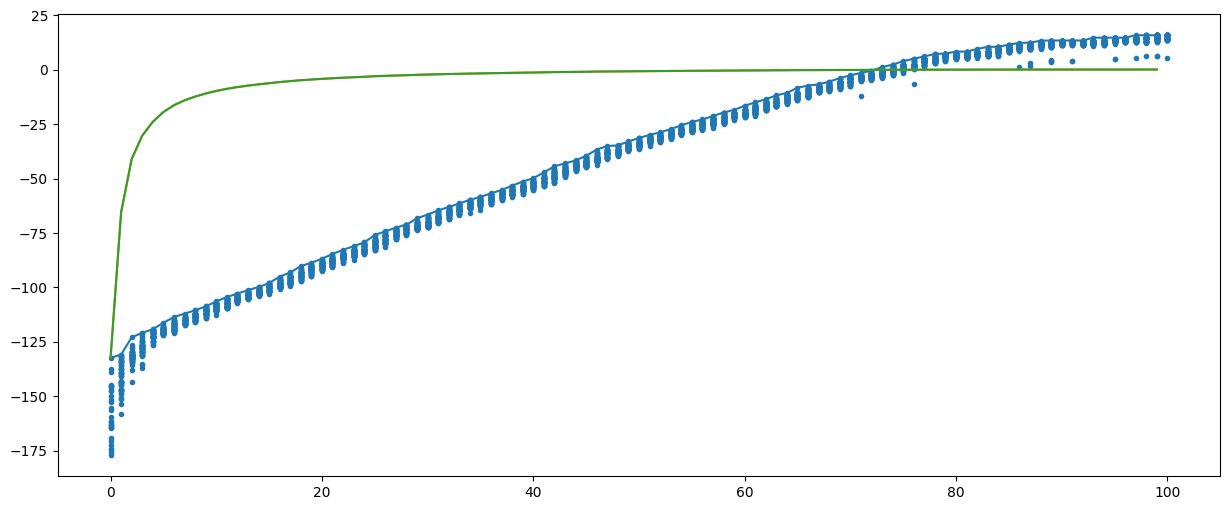

In [851]:
off_line = [max(f[1] for f in fitness_log if f[0] == x) / (x + 1) for x in range(NUM_GENERATIONS)]
on_line = [max(f[1] for f in fitness_log if f[0] <= x) / (x + 1) for x in range(NUM_GENERATIONS)]
gen_best = [max(f[1] for f in fitness_log if f[0] == x) for x in range(NUM_GENERATIONS)]

plt.figure(figsize=(15, 6))
plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".")
plt.plot([x for x, _ in enumerate(gen_best)], [y for _, y in enumerate(gen_best)])
plt.plot([x for x, _ in enumerate(on_line)], [y for _, y in enumerate(on_line)])
plt.plot([x for x, _ in enumerate(off_line)], [y for _, y in enumerate(off_line)])